In [1]:
library(openxlsx)
library(psych)
library(ggplot2)
library(rworldmap)
library(classInt)
library(RColorBrewer)


Attaching package: ‘ggplot2’


The following objects are masked from ‘package:psych’:

    %+%, alpha


Loading required package: sp

### Welcome to rworldmap ###

For a short introduction type : 	 vignette('rworldmap')



In [16]:
df = read.csv("/Users/masanoritakahashi/Documents/講義/ゼミ/M2/空間生存時間/修士論文/plot/4_6解析結果可視化用0202.csv")

df2 <- read.xlsx("../../data/data_covid_fix_name.xlsx")
df2 <- na.omit(df2)
head(df2)

,country,pop,urb,gdp,dist,hf,pf,ef,date_first,detection,status,cumul,air
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Albania,2866376,60.319,13364.155,6996524,7.84,8.005411,7.67,70,74.3,1,108641,303.14
2,Algeria,42228429,72.629,15481.788,9108277,4.99,5.201489,4.77,58,12.0,1,80272,6442.44
3,Angola,30809762,65.514,6452.355,10490120,5.40,5.979936,4.83,83,17.9,1,303691,76.94
4,Argentina,44494502,91.870,20610.569,19025624,6.86,8.044600,5.67,65,74.9,1,92122,1516.63
6,Australia,24992369,86.012,51663.365,7608913,8.62,9.160533,8.07,26,97.3,1,1347,75667.65
7,Austria,8847037,58.297,55454.689,7103537,8.48,9.245685,7.71,58,73.2,1,80272,12935.50


In [17]:
df2$exp2_gamma <- df$exp2_gamma 

In [18]:
head(df)

,X,country,date_first,exp2_y_hat,exp2_resid,exp2_gamma,exp1_y_hat,exp1_resid,exp1_gamma
,<int>,<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,Albania,70,67.87047,2.129528,1.191370e-14,60.41211,9.587892,0.4450382
2,1,Algeria,58,71.97746,-13.977457,2.430433e-06,74.32925,-16.329246,0.5080703
3,2,Angola,83,74.06241,8.937594,7.331769e-23,76.94806,6.051937,0.4483654
4,3,Argentina,65,57.92926,7.070743,8.481927e-11,68.30205,-3.302054,0.3697041
5,4,Australia,26,27.14252,-1.142524,9.954729e-01,36.85037,-10.850366,0.5973319
6,5,Austria,58,63.28963,-5.289631,1.354465e-07,56.32324,1.676764,0.4367814


In [19]:
head(df, 25)

,X,country,date_first,exp2_y_hat,exp2_resid,exp2_gamma,exp1_y_hat,exp1_resid,exp1_gamma
,<int>,<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,Albania,70,67.87047,2.1295277,1.191370e-14,60.41211,9.587892,0.4450382
2,1,Algeria,58,71.97746,-13.9774575,2.430433e-06,74.32925,-16.329246,0.5080703
3,2,Angola,83,74.06241,8.9375943,7.331769e-23,76.94806,6.051937,0.4483654
4,3,Argentina,65,57.92926,7.0707434,8.481927e-11,68.30205,-3.302054,0.3697041
5,4,Australia,26,27.14252,-1.1425239,9.954729e-01,36.85037,-10.850366,0.5973319
6,5,Austria,58,63.28963,-5.2896313,1.354465e-07,56.32324,1.676764,0.4367814
7,6,Azerbaijan,61,72.06850,-11.0685033,1.206995e-08,65.33430,-4.334301,0.4738771
8,7,Bahamas,77,69.24246,7.7575386,9.205051e-18,72.59141,4.408587,0.4712162
9,8,Bahrain,56,62.74332,-6.7433172,6.194245e-06,58.15638,-2.156382,0.4418670


In [5]:
map_obj <- joinCountryData2Map(df, joinCode="NAME", nameJoinColumn="country")

149 codes from your data successfully matched countries in the map
1 codes from your data failed to match with a country code in the map
94 codes from the map weren't represented in your data


# exp1

pdf 
  2

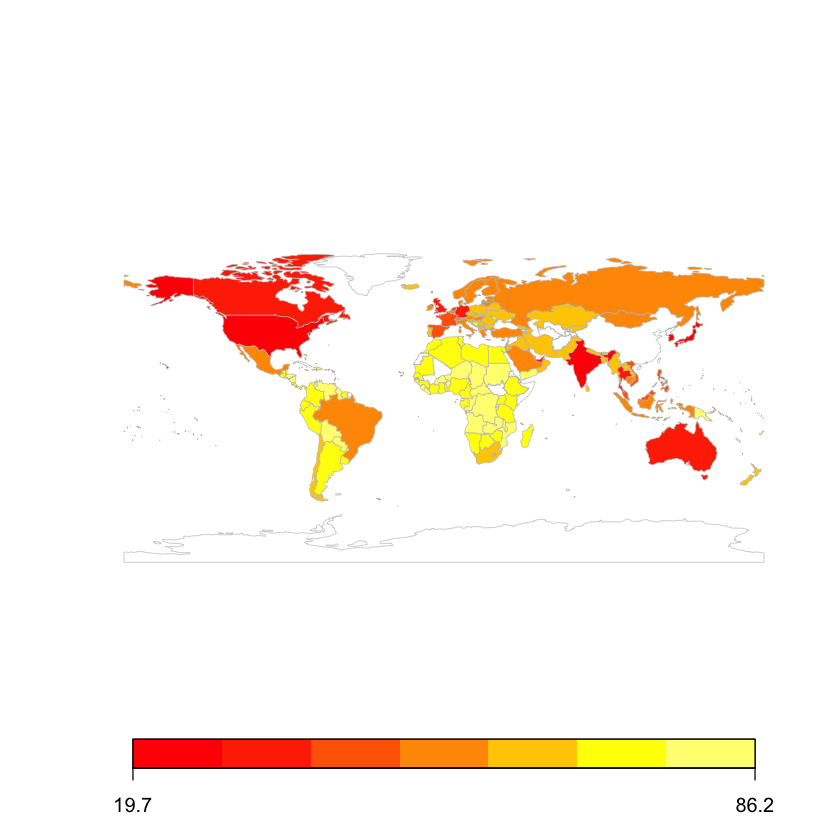

In [6]:
# y_hat
setEPS()
postscript("/Users/masanoritakahashi/Documents/講義/ゼミ/M2/空間生存時間/修士論文/plot/exp1_y_hat_world.eps")
mapCountryData(map_obj, nameColumnToPlot="exp1_y_hat"
               , catMethod="fixedWidth"
               , addLegend = TRUE
               , colourPalette=heat.colors(7)
              ,mapTitle = "")

dev.off()

mapCountryData(map_obj, nameColumnToPlot="exp1_y_hat"
               , catMethod="fixedWidth"
               , addLegend = TRUE
               , colourPalette=heat.colors(7)
              ,mapTitle = "")

pdf 
  2

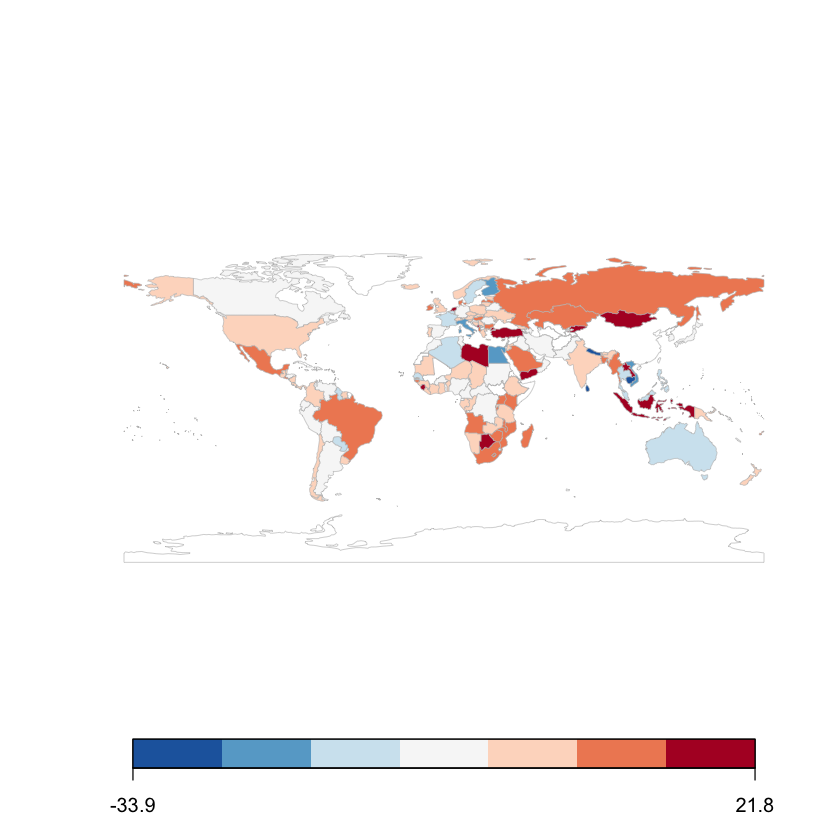

In [7]:
# 残差
setEPS()
postscript("/Users/masanoritakahashi/Documents/講義/ゼミ/M2/空間生存時間/修士論文/plot/exp1_resid_world.eps")

mapCountryData(map_obj, nameColumnToPlot="exp1_resid"
               , catMethod="fixedWidth"
               , addLegend = TRUE
               , colourPalette=rev(brewer.pal(7, "RdBu"))
               , missingCountryCol = NA
              ,mapTitle = "")

dev.off()

mapCountryData(map_obj, nameColumnToPlot="exp1_resid"
               , catMethod="fixedWidth"
               , addLegend = TRUE
               , colourPalette=rev(brewer.pal(7, "RdBu"))
               , missingCountryCol = NA
              ,mapTitle = "")

pdf 
  2

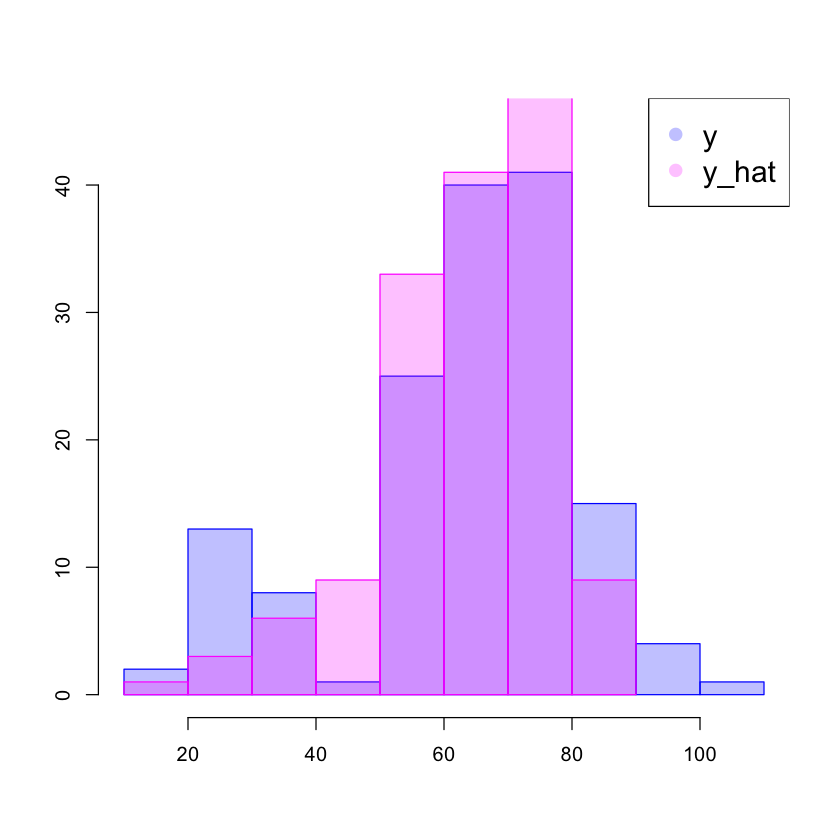

In [7]:
pdf("/Users/masanoritakahashi/Documents/講義/ゼミ/M2/空間生存時間/修士論文/plot/exp1_y_y_hat.pdf") 

hist(df$date_first, col = "#0000ff40", border = "#0000ff", main="", xlab="", ylab="", ylim=c(0, 45))
hist(df$exp1_y_hat, col = "#ff00ff40", border = "#ff00ff", add = TRUE, main="", xlab="", ylab="", ylim=c(0, 45))
legend("topright", legend=c("y", "y_hat"), col=c("#0000ff40", "#ff00ff40"), pch=16, cex=1.5)
dev.off()

hist(df$date_first, col = "#0000ff40", border = "#0000ff", main="", xlab="", ylab="", ylim=c(0, 45))
hist(df$exp1_y_hat, col = "#ff00ff40", border = "#ff00ff", add = TRUE, main="", xlab="", ylab="", ylim=c(0, 45))
legend("topright", legend=c("y", "y_hat"), col=c("#0000ff40", "#ff00ff40"), pch=16, cex=1.5)

In [8]:
head(sort(df$exp1_gamma))

[1] 7.768531e-31 1.863098e-02 8.614819e-02 1.434360e-01 1.692963e-01
[6] 2.888402e-01

pdf 
  2

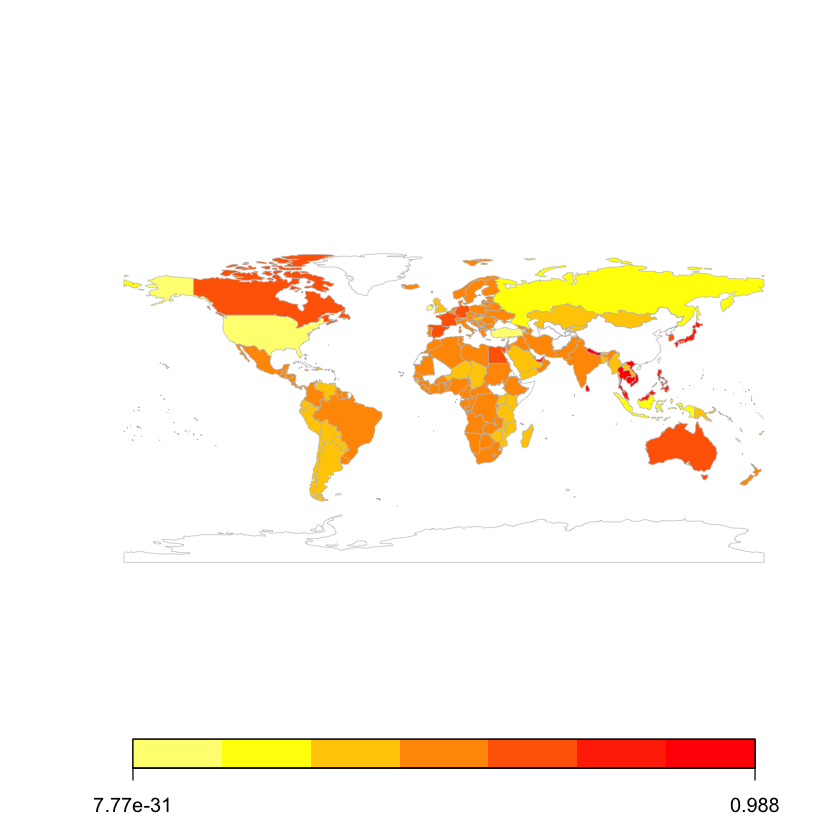

In [9]:
setEPS()
postscript("/Users/masanoritakahashi/Documents/講義/ゼミ/M2/空間生存時間/修士論文/plot/exp1_gamma_world.eps")
mapCountryData(map_obj, nameColumnToPlot="exp1_gamma"
               , catMethod="fixedWidth"
               , addLegend = TRUE
              ,mapTitle = "")

dev.off()

mapCountryData(map_obj, nameColumnToPlot="exp1_gamma"
               , catMethod="fixedWidth"
               , addLegend = TRUE
              ,mapTitle = "")

pdf 
  2

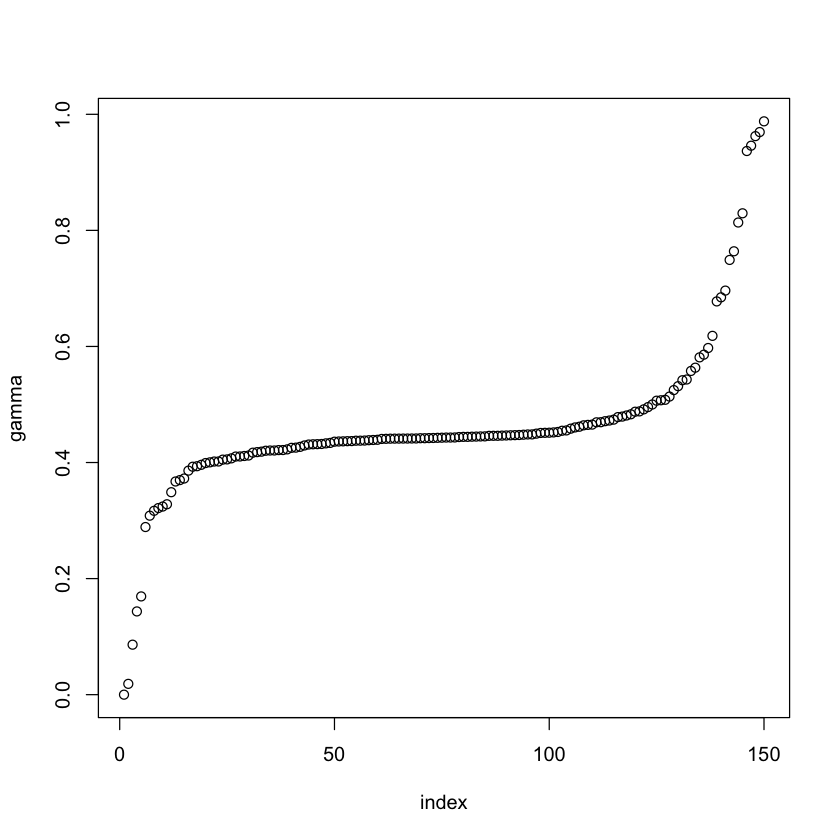

In [10]:
setEPS()
postscript("/Users/masanoritakahashi/Documents/講義/ゼミ/M2/空間生存時間/修士論文/plot/exp1_gamma.eps")
plot(sort(df$exp1_gamma), xlab="index", ylab="gamma")
dev.off()

plot(sort(df$exp1_gamma), xlab="index", ylab="gamma")

Saving 7 x 7 in image



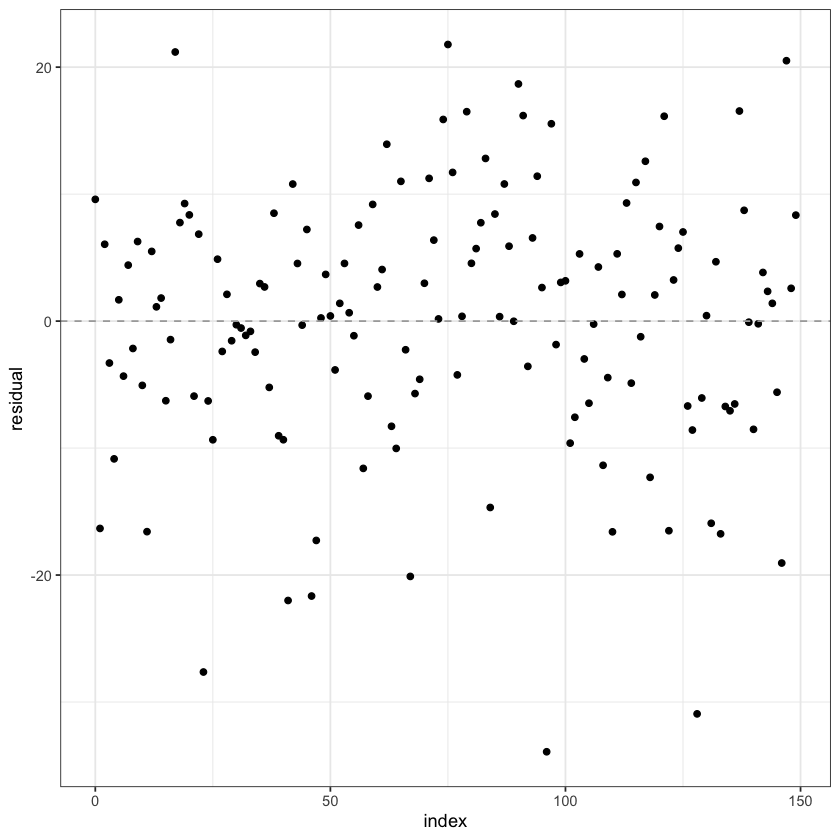

In [11]:
g<-ggplot(df, aes(x=df$X, y=df$exp1_resid)) + geom_point()　+ xlab("index")+ ylab("residual")
g <- g + theme_bw() + geom_hline(yintercept = 0, linetype=2,color="darkgrey") 
plot(g)

ggsave("/Users/masanoritakahashi/Documents/講義/ゼミ/M2/空間生存時間/修士論文/plot/exp1_resid_scatter.eps")

Saving 7 x 7 in image



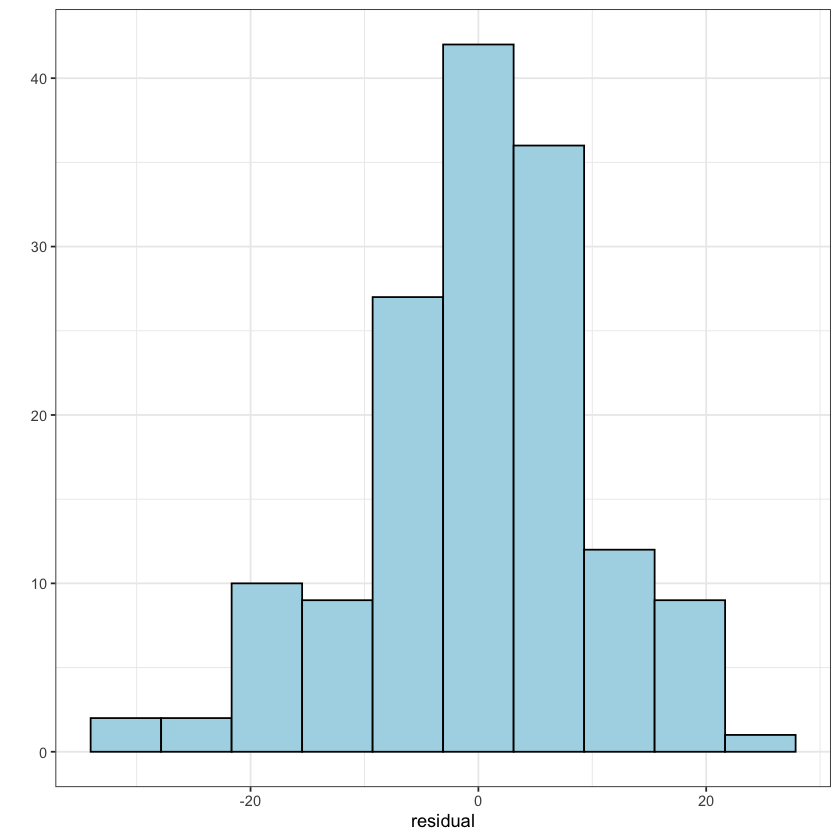

In [12]:
g <- ggplot(df, aes(x = df$exp1_resid))
g <- g + geom_histogram(color="black",fill="light blue", bins = 10) + theme_bw()+ xlab("residual")+ ylab("")
plot(g)

ggsave("/Users/masanoritakahashi/Documents/講義/ゼミ/M2/空間生存時間/修士論文/plot/exp1_resid.eps")

# exp2

pdf 
  2

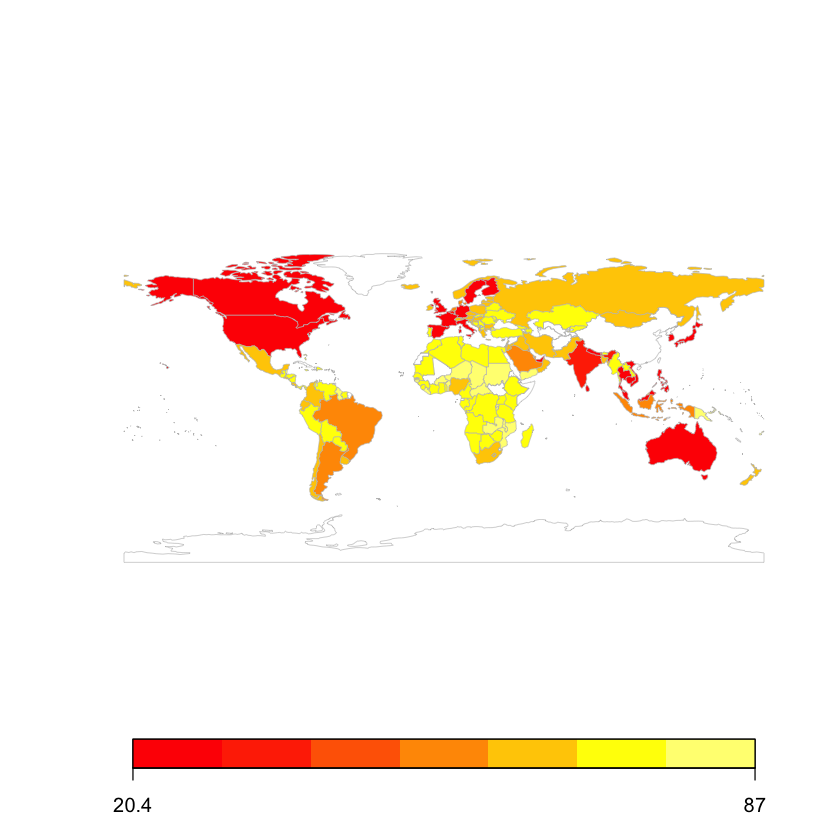

In [8]:
# y_hat
setEPS()
postscript("/Users/masanoritakahashi/Documents/講義/ゼミ/M2/空間生存時間/修士論文/plot/exp2_y_hat_world.eps")
mapCountryData(map_obj, nameColumnToPlot="exp2_y_hat"
               , catMethod="fixedWidth"
               , addLegend = TRUE
               , colourPalette=heat.colors(7)
              ,mapTitle = "")

dev.off()

mapCountryData(map_obj, nameColumnToPlot="exp2_y_hat"
               , catMethod="fixedWidth"
               , addLegend = TRUE
               , colourPalette=heat.colors(7)
              ,mapTitle = "")

pdf 
  2

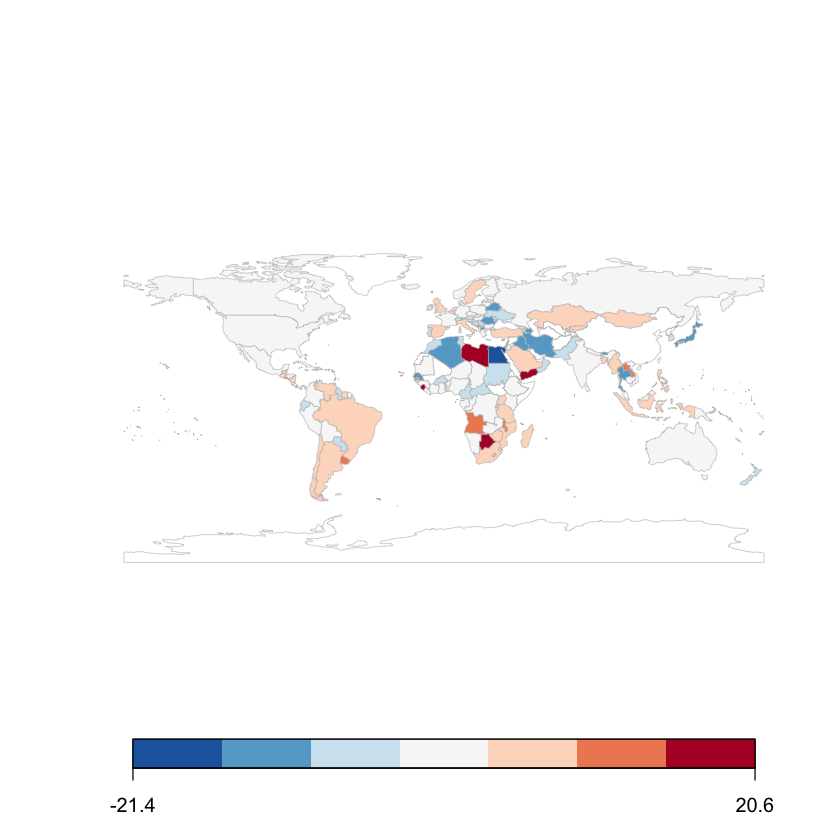

In [9]:
# 残差
setEPS()
postscript("/Users/masanoritakahashi/Documents/講義/ゼミ/M2/空間生存時間/修士論文/plot/exp2_resid_world.eps")

mapCountryData(map_obj, nameColumnToPlot="exp2_resid"
               , catMethod="fixedWidth"
               , addLegend = TRUE
               , colourPalette=rev(brewer.pal(7, "RdBu"))
               , missingCountryCol = NA
              ,mapTitle = "")

dev.off()

mapCountryData(map_obj, nameColumnToPlot="exp2_resid"
               , catMethod="fixedWidth"
               , addLegend = TRUE
               , colourPalette=rev(brewer.pal(7, "RdBu"))
               , missingCountryCol = NA
              ,mapTitle = "")

pdf 
  2

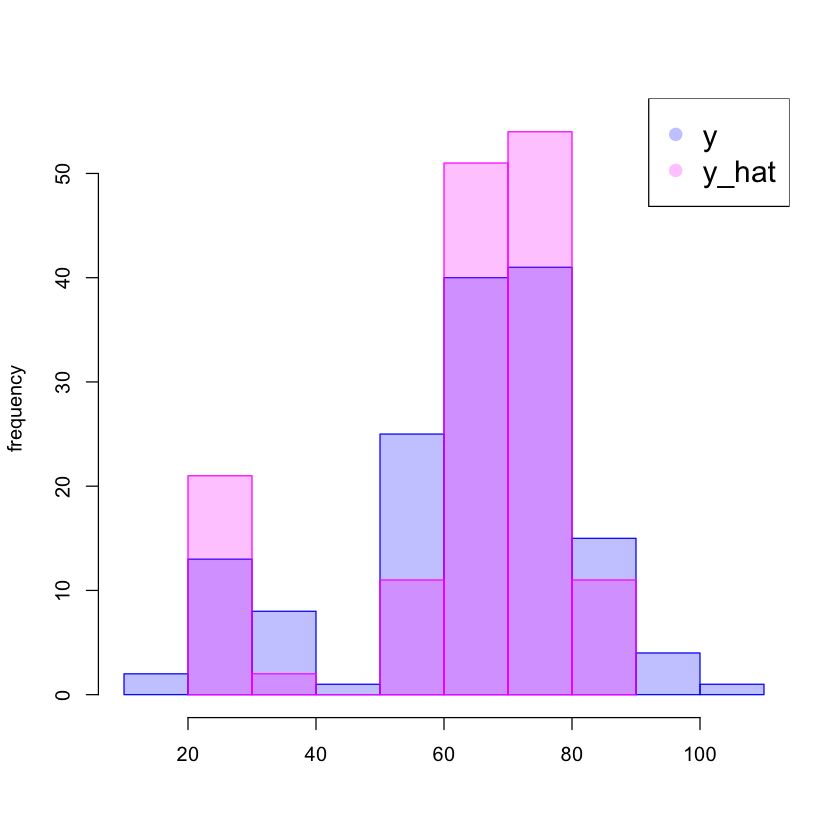

In [11]:
pdf("/Users/masanoritakahashi/Documents/講義/ゼミ/M2/空間生存時間/修士論文/plot/exp2_y_y_hat.pdf") 

hist(df$date_first, col = "#0000ff40", border = "#0000ff", main="", xlab="", ylab="frequency", ylim=c(0, 55))
hist(df$exp2_y_hat, col = "#ff00ff40", border = "#ff00ff", add = TRUE, main="", xlab="", ylab="", ylim=c(0, 55))
legend("topright", legend=c("y", "y_hat"), col=c("#0000ff40", "#ff00ff40"), pch=16, cex=1.5)
dev.off()

hist(df$date_first, col = "#0000ff40", border = "#0000ff", main="", xlab="", ylab="frequency", ylim=c(0, 55))
hist(df$exp2_y_hat, col = "#ff00ff40", border = "#ff00ff", add = TRUE, main="", xlab="", ylab="", ylim=c(0, 55))
legend("topright", legend=c("y", "y_hat"), col=c("#0000ff40", "#ff00ff40"), pch=16, cex=1.5)

pdf 
  2

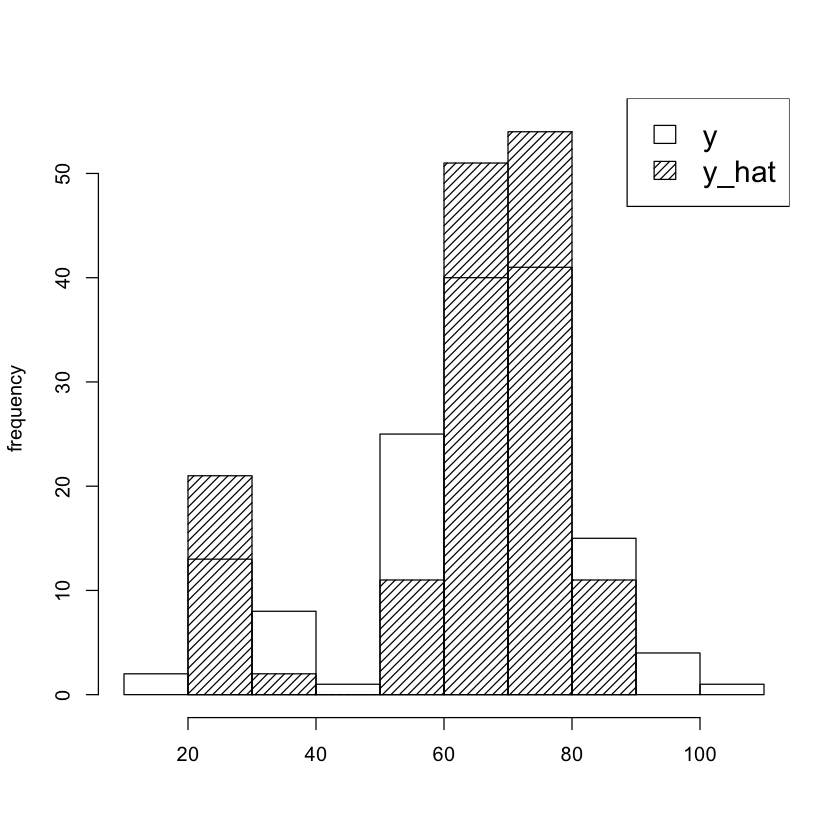

In [4]:
setEPS()
postscript("/Users/masanoritakahashi/Documents/講義/ゼミ/M2/空間生存時間/修士論文/plot/abst_y_y_hat.eps") 
hist(df$date_first,  main="", xlab="", ylab="frequency", ylim=c(0, 55))
hist(df$exp2_y_hat, col="black", density=20, angle=45, add = TRUE, main="", xlab="", ylab="frequency", ylim=c(0, 55))
legend("topright", legend=c("y", "y_hat"), col=c("black", "black"), density=c(0 ,20),  cex=1.5)
dev.off()


hist(df$date_first,  main="", xlab="", ylab="frequency", ylim=c(0, 55))
hist(df$exp2_y_hat, col="black", density=20, angle=45, add = TRUE, main="", xlab="", ylab="frequency", ylim=c(0, 55))
#hist(df$exp2_y_hat, col="gray", density=20, angle=45, add = TRUE, main="", xlab="", ylab="", ylim=c(0, 55))
legend("topright", legend=c("y", "y_hat"), col=c("black", "black"), density=c(0 ,20),  cex=1.5)

pdf 
  2

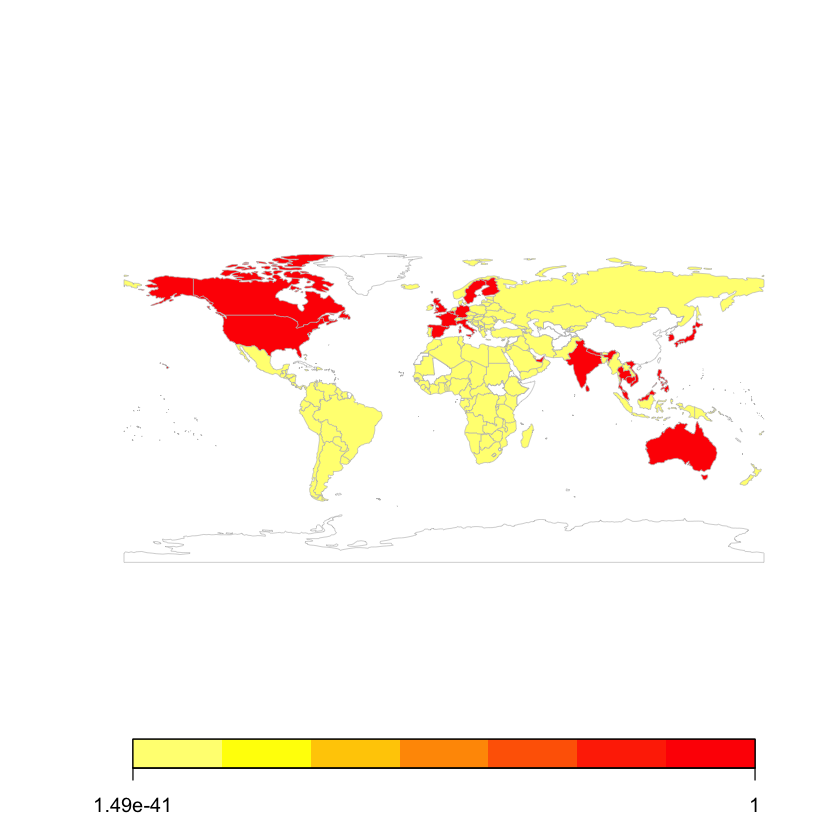

In [16]:
setEPS()
postscript("/Users/masanoritakahashi/Documents/講義/ゼミ/M2/空間生存時間/修士論文/plot/exp2_gamma_world.eps")
mapCountryData(map_obj, nameColumnToPlot="exp2_gamma"
               , catMethod="fixedWidth"
               , addLegend = TRUE
              ,mapTitle = "")

dev.off()

mapCountryData(map_obj, nameColumnToPlot="exp2_gamma"
               , catMethod="fixedWidth"
               , addLegend = TRUE
              ,mapTitle = "")

pdf 
  2

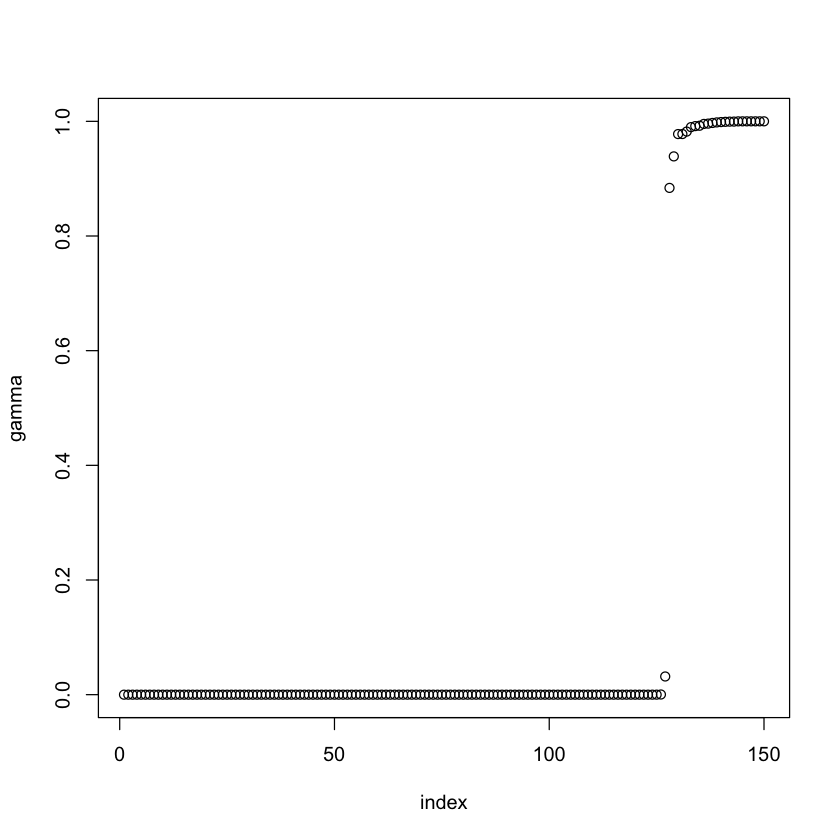

In [17]:
setEPS()
postscript("/Users/masanoritakahashi/Documents/講義/ゼミ/M2/空間生存時間/修士論文/plot/exp2_gamma.eps")
plot(sort(df$exp2_gamma), xlab="index", ylab="gamma")
dev.off()

plot(sort(df$exp2_gamma), xlab="index", ylab="gamma")

Saving 7 x 7 in image



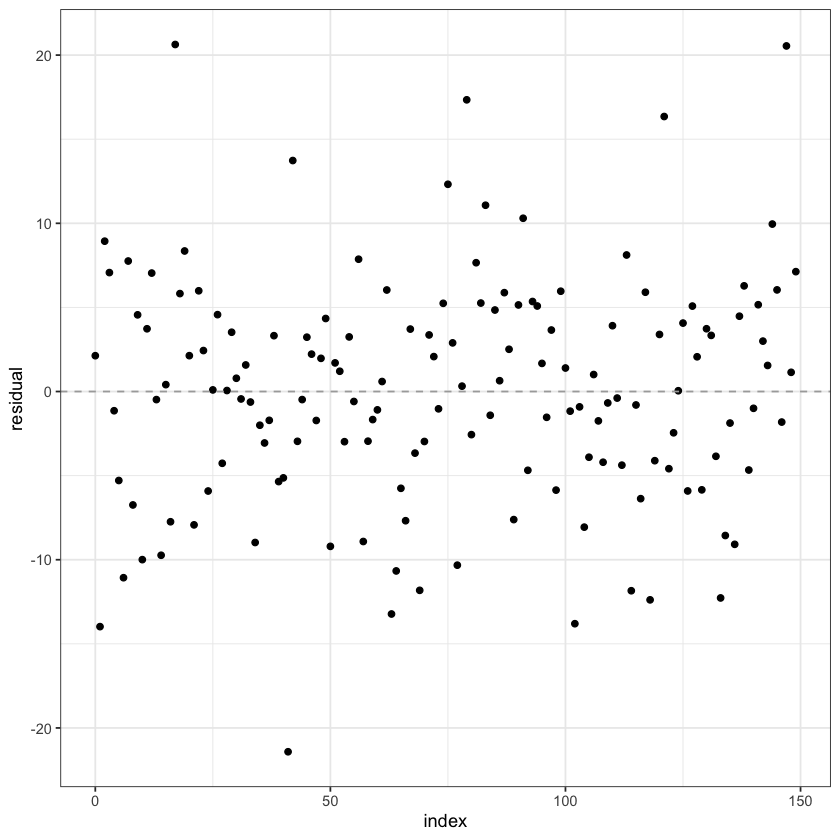

In [18]:
g<-ggplot(df, aes(x=df$X, y=df$exp2_resid)) + geom_point()　+ xlab("index")+ ylab("residual")
g <- g + theme_bw() + geom_hline(yintercept = 0, linetype=2,color="darkgrey") 
plot(g)

ggsave("/Users/masanoritakahashi/Documents/講義/ゼミ/M2/空間生存時間/修士論文/plot/exp2_resid_scatter.eps")

Saving 7 x 7 in image



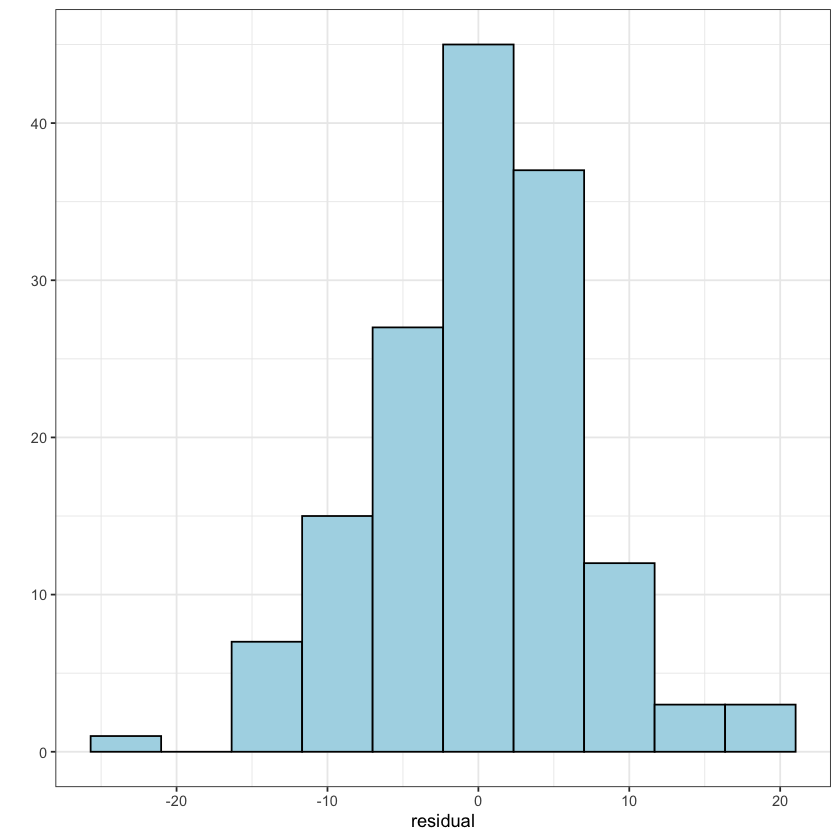

In [19]:
g <- ggplot(df, aes(x = df$exp2_resid))
g <- g + geom_histogram(color="black",fill="light blue", bins = 10) + theme_bw()+ xlab("residual")+ ylab("")
plot(g)

ggsave("/Users/masanoritakahashi/Documents/講義/ゼミ/M2/空間生存時間/修士論文/plot/exp2_resid.eps")

In [62]:
df2["gamma"]="0"
df2[df2$exp2_gamma>0.5,]["gamma"] = "component1"
df2[df2$exp2_gamma<0.5,]["gamma"] ="component2"

In [63]:
early_df = df2[df2["gamma"]== "component1",]
late_df = df2[df2["gamma"]== "component2",]

In [64]:
#urb, pop, gdp, air, detection

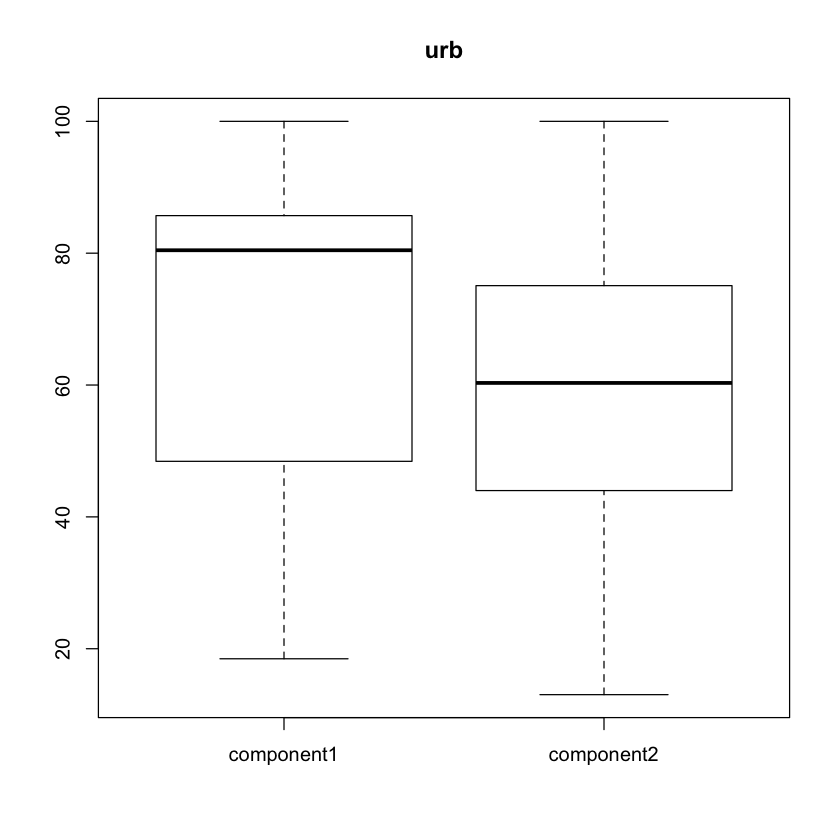

In [65]:
boxplot(early_df$urb, late_df$urb, names=c("component1", "component2"), main="urb", range=1.5)

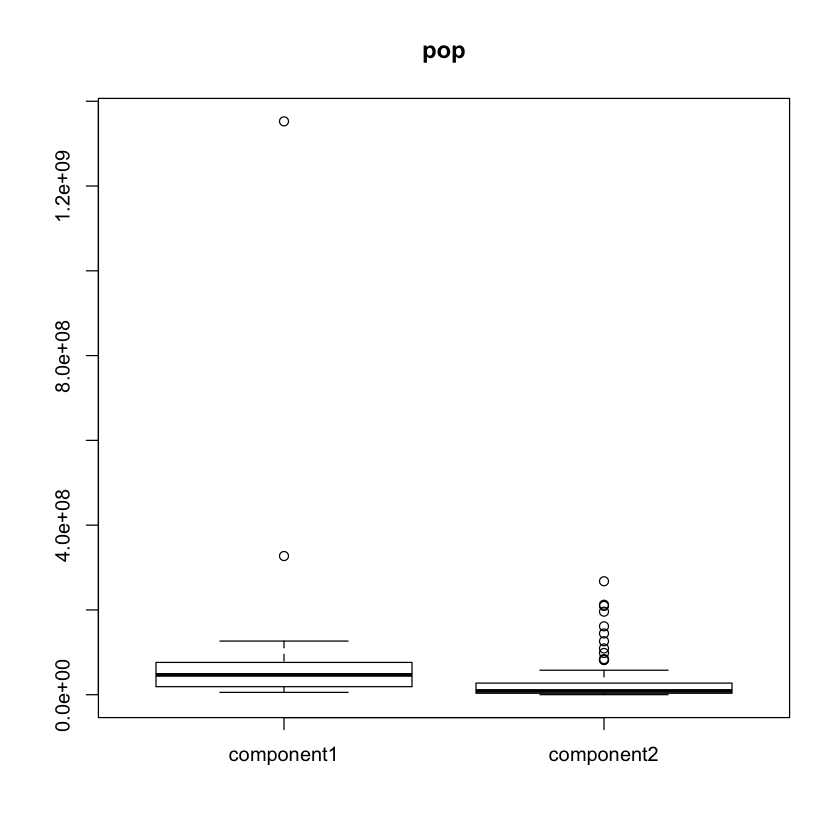

In [44]:
boxplot(early_df$pop, late_df$pop, names=c("component1", "component2"), main="pop", range=1.5)

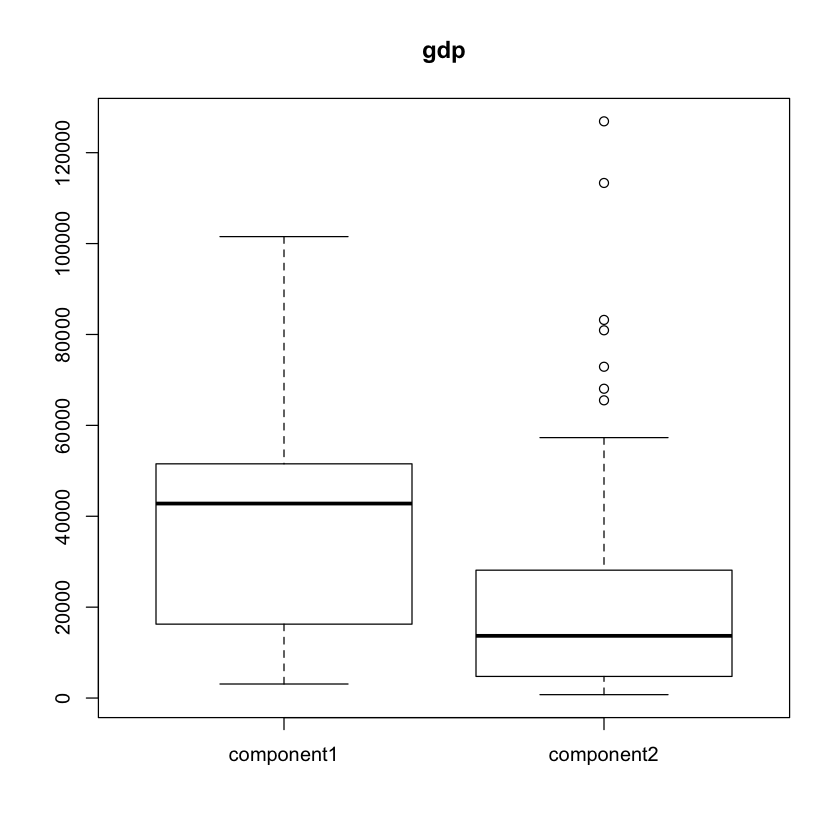

In [45]:
boxplot(early_df$gdp, late_df$gdp, names=c("component1", "component2"), main="gdp", range=1.5)

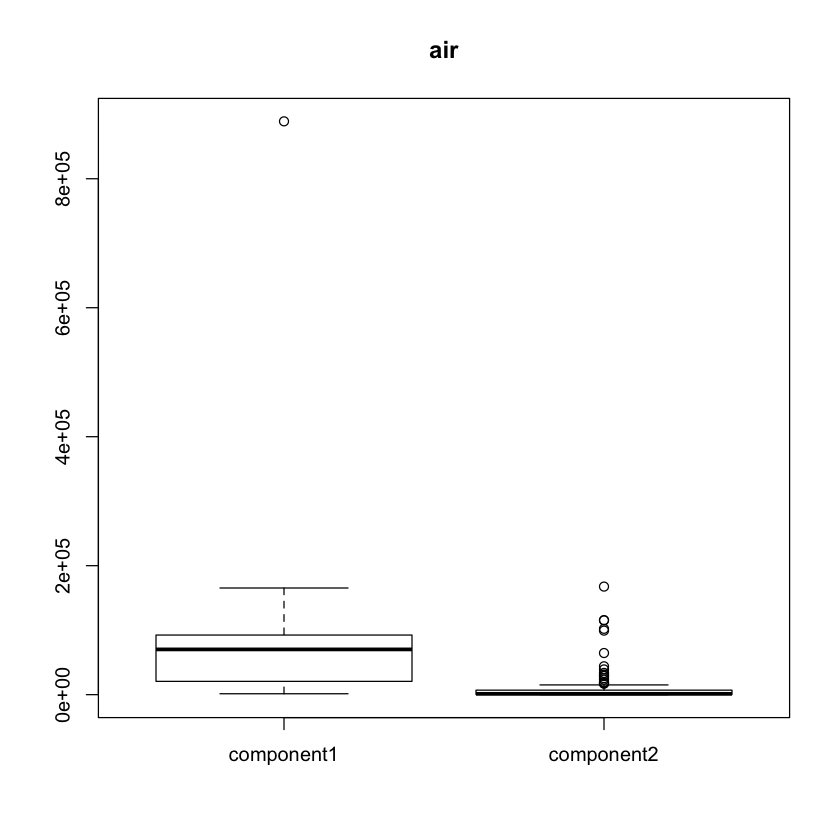

In [46]:
boxplot(early_df$air, late_df$air, names=c("component1", "component2"), main="air", range=1.5)

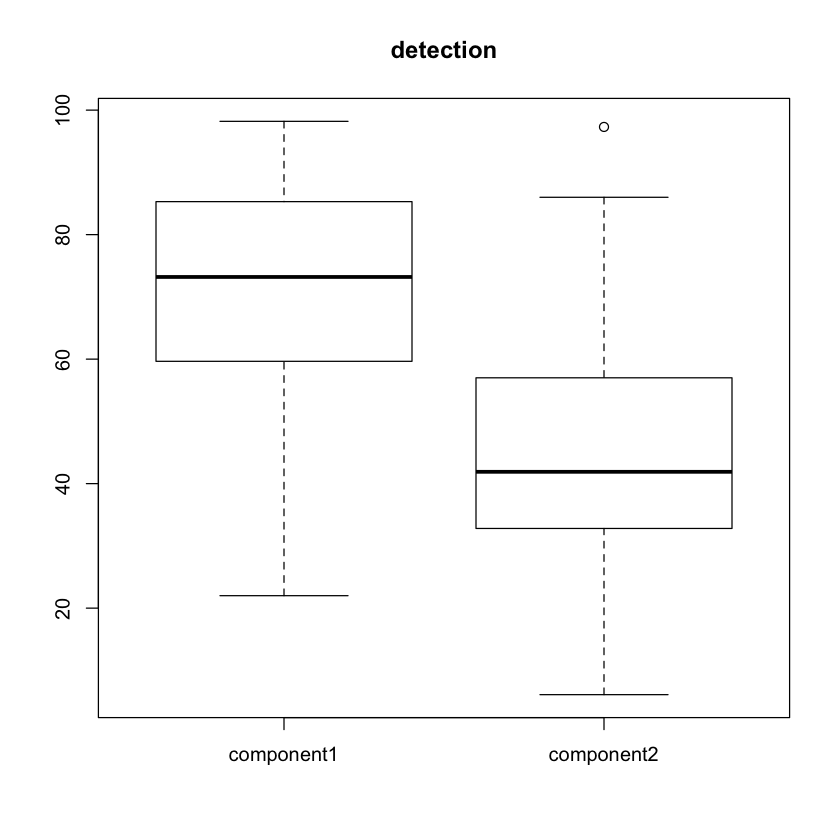

In [47]:
boxplot(early_df$detection, late_df$detection, names=c("component1", "component2"), main="detection", range=1.5)

pdf 
  2

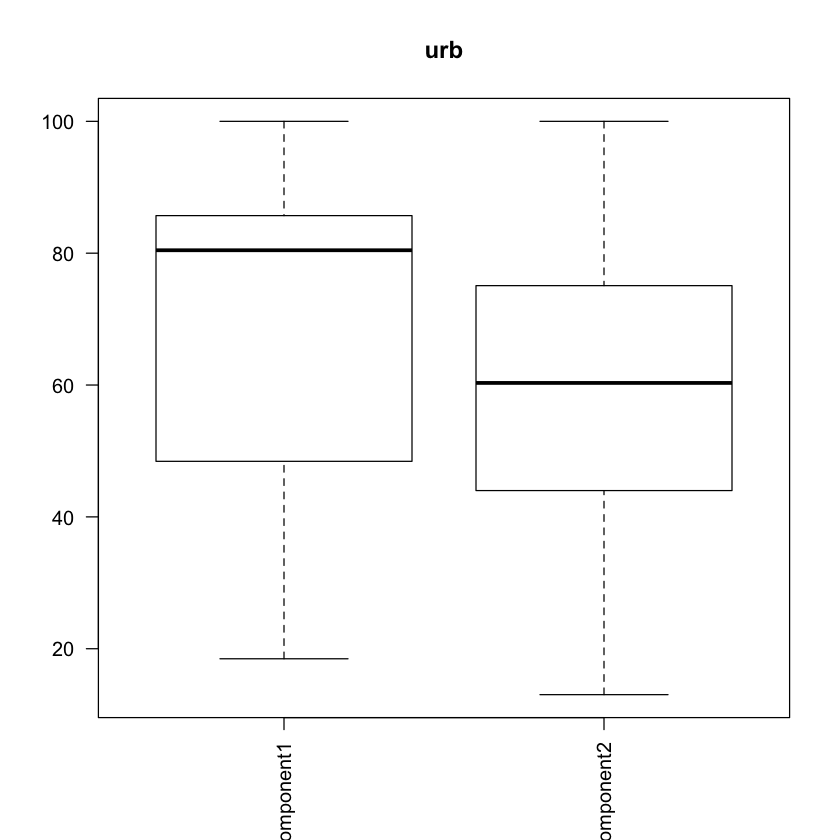

In [95]:
png("/Users/masanoritakahashi/Documents/講義/ゼミ/M2/空間生存時間/修士論文/plot/exp2_gamma_boxplot.png")

par(mfrow=c(2,3)) 
boxplot(early_df$urb, late_df$urb, names=c("component1", "component2"), main="urb", range=1.5, las=2)

dev.off()
boxplot(early_df$urb, late_df$urb, names=c("component1", "component2"), main="urb", range=1.5, las=2)


pdf 
  2

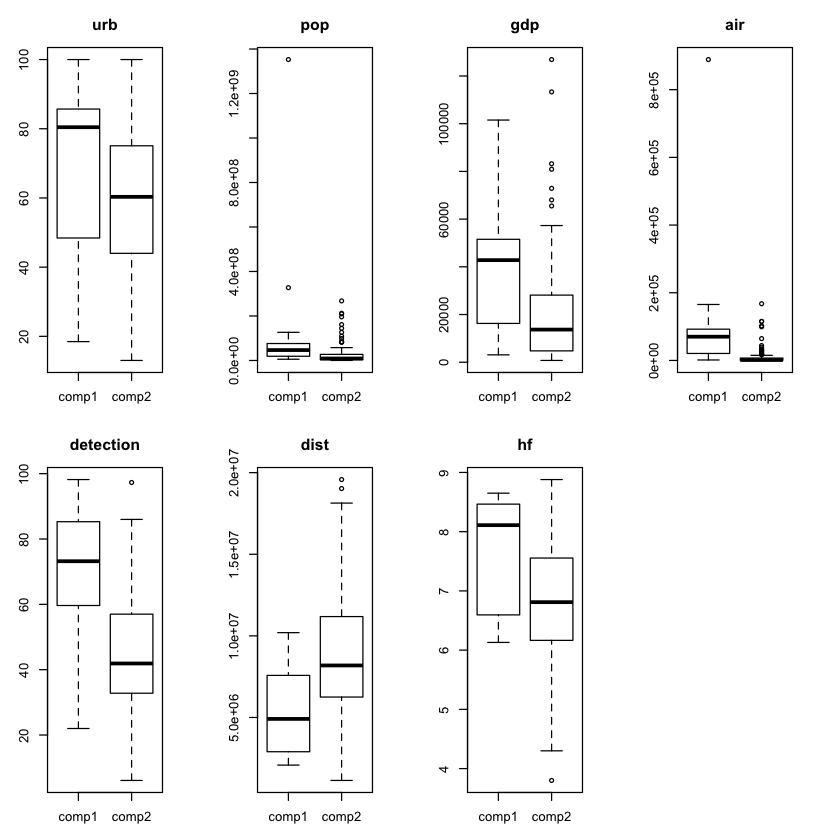

In [128]:
setEPS()
postscript("/Users/masanoritakahashi/Documents/講義/ゼミ/M2/空間生存時間/修士論文/plot/exp2_gamma_boxplot.eps")

par(mfrow=c(2,4),mar = c(3, 3, 3, 3)) 
boxplot(early_df$urb, late_df$urb, names=c("comp1", "comp2"), main="urb", range=1.5, show.names=TRUE)
boxplot(early_df$pop, late_df$pop, names=c("comp1", "comp2"), main="pop", range=1.5)
boxplot(early_df$gdp, late_df$gdp, names=c("comp1", "comp2"), main="gdp", range=1.5)
boxplot(early_df$air, late_df$air, names=c("comp1", "comp2"), main="air", range=1.5)
boxplot(early_df$detection, late_df$detection, names=c("comp1", "comp2"), main="detection", range=1.5)
boxplot(early_df$dist, late_df$dist, names=c("comp1", "comp2"), main="dist", range=1.5)
boxplot(early_df$hf, late_df$hf, names=c("comp1", "comp2"), main="hf", range=1.5)

dev.off()

par(mfrow=c(2,4),mar = c(3, 3, 3, 3)) 
boxplot(early_df$urb, late_df$urb, names=c("comp1", "comp2"), main="urb", range=1.5, show.names=TRUE)
boxplot(early_df$pop, late_df$pop, names=c("comp1", "comp2"), main="pop", range=1.5)
boxplot(early_df$gdp, late_df$gdp, names=c("comp1", "comp2"), main="gdp", range=1.5)
boxplot(early_df$air, late_df$air, names=c("comp1", "comp2"), main="air", range=1.5)
boxplot(early_df$detection, late_df$detection, names=c("comp1", "comp2"), main="detection", range=1.5)
boxplot(early_df$dist, late_df$dist, names=c("comp1", "comp2"), main="dist", range=1.5)
boxplot(early_df$hf, late_df$hf, names=c("comp1", "comp2"), main="hf", range=1.5)


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



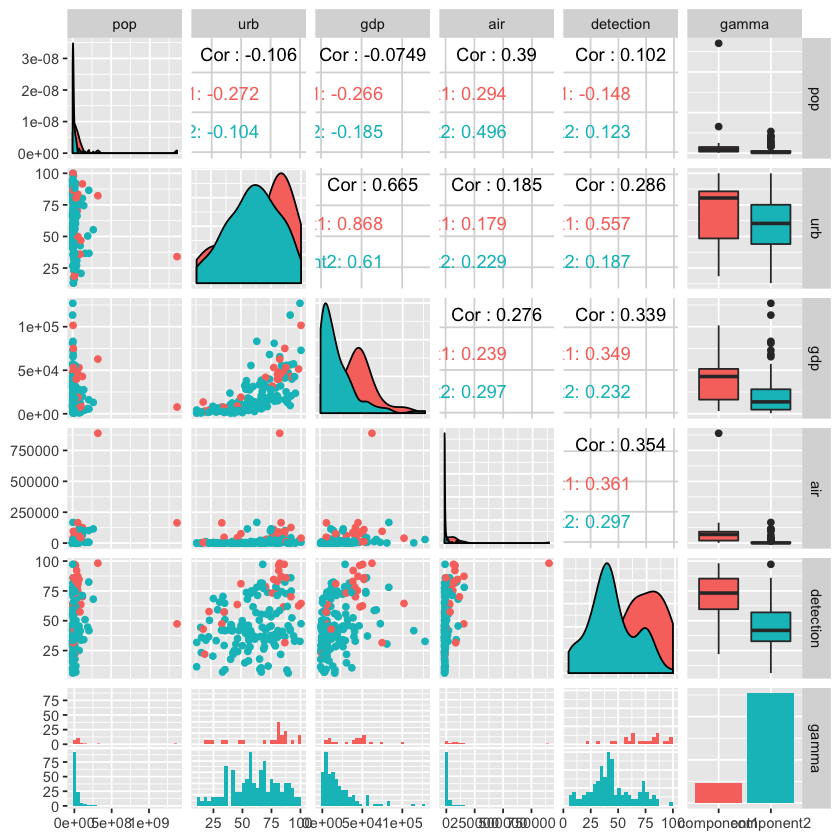

In [66]:
library("GGally")
ggpairs(df2[c("pop", "urb", "gdp", "air", "detection", "gamma")], aes_string(color="gamma"))